In [1]:
from modnet.preprocessing import MODData
data=MODData.load('../DATAFILES/matbench_perovskites_moddata.pkl.gz')

2022-12-12 17:19:50,732 - modnet - INFO - Loaded <modnet.preprocessing.MODData object at 0x7fb3340c5580> object, created with modnet version 0.1.12


In [36]:
data.df_targets['e_form']

,e_form
id0,2.16
id1,1.52
id2,1.48
id3,1.24
id4,0.62
...,...
id18923,1.66
id18924,2.12
id18925,1.50
id18926,2.48


In [34]:
!ls

/bin/bash: /mnt/c/Users/roger/Documents/programas/UCLouvain/env_modnet/lib/libtinfo.so.6: no version information available (required by /bin/bash)
BaggingLR_OFM.ipynb	       OFM_customfeaturized18928.pkl
DATAFILES		       OFM_customfeaturized2000.pkl
Featurization		       OFM_customfeaturized3000.pkl
FeaturizingData.ipynb	       OFM_customfeaturized4000.pkl
OFMClusterModel		       OFM_customfeaturized5000.pkl
OFM_customfeaturized1000.pkl   OFM_customfeaturized6000.pkl
OFM_customfeaturized10000.pkl  OFM_customfeaturized7000.pkl
OFM_customfeaturized11000.pkl  OFM_customfeaturized8000.pkl
OFM_customfeaturized12000.pkl  OFM_customfeaturized9000.pkl
OFM_customfeaturized13000.pkl  README.md
OFM_customfeaturized14000.pkl  make_subsets_data.py
OFM_customfeaturized15000.pkl  noOFM
OFM_customfeaturized16000.pkl  run_benchmark.py
OFM_customfeaturized17000.pkl  withOFM
OFM_customfeaturized18000.pkl


In [ ]:
from matminer.featurizers.structure import OrbitalFieldMatrix
import pickle, os
try:
    os.mkdir("OFM_featurization")
except:
    pass
featurizers=[OrbitalFieldMatrix(period_tag=False)]
for featurizer in featurizers:
    for idx in list(range(0,17000,1000)):
        featurizer=OrbitalFieldMatrix()
        featurizer.set_n_jobs(8)
        #data.df_structure=data.df_structure #.sample(n=10, random_state=1)
        print(idx,idx+1000)
        df_feat=featurizer.featurize_dataframe(data.df_structure[idx:idx+1000], 'structure',)
                                               #ignore_errors=True,return_errors=True)
        # save complete featurized dataframe
        pickle.dump(df_feat, open(f"OFM_featurization/OFM_customfeaturized{idx+1000}.pkl","wb"))

    df_feat=featurizer.featurize_dataframe(data.df_structure[17000:18000], 'structure',)
    # save complete featurized dataframe
    pickle.dump(df_feat, open(f"OFM_featurization/OFM_customfeaturized18000.pkl","wb"))
    df_feat=featurizer.featurize_dataframe(data.df_structure[18000:], 'structure',)
    # save complete featurized dataframe
    pickle.dump(df_feat, open(f"OFM_featurization/OFM_customfeaturized18928.pkl","wb"))

In [1]:
import pickle, glob
OFMs=[]
for idx in list(range(0,18000,1000))+[17928]:
    file=f"OFM_featurization/OFM_customfeaturized{idx+1000}.pkl"
    OFM=pickle.load(open(file,"rb"))
    OFMs.append(OFM)
    print(f"Loaded {file}.")
import pandas as pd
featurizedOFM=pd.concat(OFMs,axis=0)
featurizedOFM=featurizedOFM.drop(['species','structure'],axis=1)
pickle.dump(featurizedOFM,open("OFM_featurization/OFM_featurizedDF.pkl","wb"))
featurizedOFM

Loaded OFM_featurization/OFM_customfeaturized1000.pkl.
Loaded OFM_featurization/OFM_customfeaturized2000.pkl.
Loaded OFM_featurization/OFM_customfeaturized3000.pkl.
Loaded OFM_featurization/OFM_customfeaturized4000.pkl.
Loaded OFM_featurization/OFM_customfeaturized5000.pkl.
Loaded OFM_featurization/OFM_customfeaturized6000.pkl.
Loaded OFM_featurization/OFM_customfeaturized7000.pkl.
Loaded OFM_featurization/OFM_customfeaturized8000.pkl.
Loaded OFM_featurization/OFM_customfeaturized9000.pkl.
Loaded OFM_featurization/OFM_customfeaturized10000.pkl.
Loaded OFM_featurization/OFM_customfeaturized11000.pkl.
Loaded OFM_featurization/OFM_customfeaturized12000.pkl.
Loaded OFM_featurization/OFM_customfeaturized13000.pkl.
Loaded OFM_featurization/OFM_customfeaturized14000.pkl.
Loaded OFM_featurization/OFM_customfeaturized15000.pkl.
Loaded OFM_featurization/OFM_customfeaturized16000.pkl.
Loaded OFM_featurization/OFM_customfeaturized17000.pkl.
Loaded OFM_featurization/OFM_customfeaturized18000.pkl.
L

,structure,species,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^1,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^5,OFM: s^1 - p^6,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
id,,,,,,,,,,,,,,,,,,,,,
id0,"[[0. 0. 0.] Rh, [1.97726555 1.97726555 1.97726...",5,0.000000e+00,0.227089,0.0,0.0,0.227089,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id1,"[[2.54041798 0. 0. ] Hf, [1.020...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008017
id2,"[[0.60790913 0. 0. ] Re, [2.186...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000475
id3,"[[2.83091357 0. 0. ] W, [2.6573...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038130
id4,"[[0.00518937 0. 0. ] Bi, [2.172...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id18923,"[[4.44077598 0. 0. ] Rb, [2.652...",5,2.440094e-07,0.184377,0.0,0.0,0.000000,0.181689,0.0,0.002688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id18924,[[4.56913824e-03 7.21569024e-19 0.00000000e+00...,5,3.721372e-12,0.194835,0.0,0.0,0.064983,0.129850,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id18925,"[[0.0040044 0. 0. ] Zn, [1.821570...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


###  Lets find the optimal PCA components to represent the OFM data.

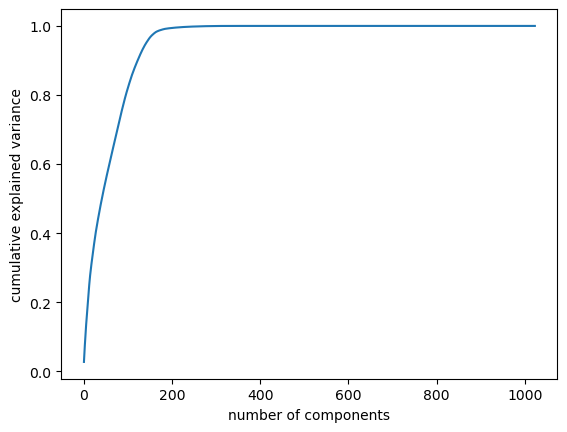

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Separating the features
X=featurizedOFM.drop(['species','structure'],axis=1)
Xcolumns=X.columns
# Standardizing the features
X = StandardScaler().fit_transform(X)
# Separating out the target ## !!! ideally I should implement this for the train set only. !!!
y = data.df_targets['e_form'] 

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### So around 200 components we have over 99% of the variance described.

In [50]:
np.cumsum(pca.explained_variance_ratio_)[200]

0.9941819169273535

In [77]:
n_components=200
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X)
OFM_PC_df = pd.DataFrame(data = principalComponents
             , columns = [f'OFM|PC_{idx+1}' for idx in range(n_components) ])
OFM_PC_df

In [75]:
### we should save the OFM components to retrieve the chemical information in each PC
n_components=200
OFM_PCAcomponents = pd.DataFrame(pca.components_[:n_components], 
                                 columns=Xcolumns,
                                 index=[f'OFM|PC_{idx+1}' for idx in range(n_components)])
import pickle
pickle.dump(OFM_PCAcomponents,open("OFM_featurization/OFM_PCAcomponents.pkl","wb"))
OFM_PCAcomponents

In [5]:
!ls

/bin/bash: /mnt/c/Users/roger/Documents/programas/UCLouvain/env_modnet/lib/libtinfo.so.6: no version information available (required by /bin/bash)
BaggingLR_OFM.ipynb	       OFM_customfeaturized18928.pkl
DATAFILES		       OFM_customfeaturized2000.pkl
Featurization		       OFM_customfeaturized3000.pkl
FeaturizingData.ipynb	       OFM_customfeaturized4000.pkl
OFMClusterModel		       OFM_customfeaturized5000.pkl
OFM_PCAcomponents.pkl	       OFM_customfeaturized6000.pkl
OFM_customfeaturized1000.pkl   OFM_customfeaturized7000.pkl
OFM_customfeaturized10000.pkl  OFM_customfeaturized8000.pkl
OFM_customfeaturized11000.pkl  OFM_customfeaturized9000.pkl
OFM_customfeaturized12000.pkl  README.md
OFM_customfeaturized13000.pkl  ase_structures.pkl
OFM_customfeaturized14000.pkl  make_subsets_data.py
OFM_customfeaturized15000.pkl  noOFM
OFM_customfeaturized16000.pkl  run_benchmark.py
OFM_customfeaturized17000.pkl  withOFM
OFM_customfeaturized18000.pkl


In [64]:
## we still can access each component allowing to restore the original data
pca.components_[0].shape
# X.shape

(18928, 1024)

### Now to featurize with SOAP. I will try to make the columns a bit more meaningful.

In [30]:
import numpy as np
from dscribe.descriptors import SOAP
import pickle
import pymatgen
from pymatgen.io.ase import AseAtomsAdaptor
from ase.data import atomic_numbers
import os
import pandas as pd
structures=data.df_structure['structure']
try:
    structures_ase=pickle.load(open("ase_structures.pkl","rb"))
except:
    structures_ase=list(map(AseAtomsAdaptor.get_atoms,structures))
    pickle.dump(structures_ase,open("ase_structures.pkl","wb"))
    
## declaring the SOAP featurizer
species=list(atomic_numbers.keys())[1:] ## all chemical species
nmax=8
lmax=6
rcut=5
average_soap = SOAP(species=species,
rcut=rcut, nmax=nmax, lmax=lmax,
    average="inner",
    crossover=True,
    periodic=True,
    sparse=False
)
soap_results = average_soap.create(structures_ase[:3])
results=[]
for i in range(len(soap_results)):
    ## SOAP data is too large and sparse, its better to work with values and index
    results.append([soap_results[i][soap_results[i].nonzero()[0]],
                     soap_results[i].nonzero()[0]])
results
# type(results)
# results=pd.DataFrame.sparse.from_spmatrix(results)
# ncpus=os.cpu_count()
# ## this is very memory intensive has to be splitted
# slices=[None]+list(range(100,len(structures_ase),100))+[None]
# for i, slice1 in list(enumerate(slices))[:-1]:
#     results = average_soap.create(structures_ase[slice1:slices[i+1]], n_jobs=ncpus)
#     pickle.dump(results, open(f"SOAP_perovsk_featurized_{i}.pkl","wb"))
#     print(f"{i} out of {len(slices)-2} subsets to complete SOAP featurization")

[[array([ 0.00024594,  0.00463535, -0.00517914, ...,  0.00927274,
         -0.0251723 ,  0.06833416]),
  array([ 309288,  309289,  309290, ..., 2115117, 2115118, 2115119])],
 [array([ 0.00071318,  0.00778535, -0.0035089 , ...,  0.14981408,
         -0.13816099,  0.13395656]),
  array([ 359268,  359269,  359270, ..., 2626397, 2626398, 2626399])],
 [array([ 0.00041332,  0.00405851, -0.00116177, ...,  0.10758495,
         -0.08258327,  0.06553132]),
  array([ 359268,  359269,  359270, ..., 2687633, 2687634, 2687635])]]

In [31]:
np_results=np.array(results)
np_results

/tmp/ipykernel_16182/3537502687.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_results=np.array(results)


array([[array([ 0.00024594,  0.00463535, -0.00517914, ...,  0.00927274,
               -0.0251723 ,  0.06833416])                              ,
        array([ 309288,  309289,  309290, ..., 2115117, 2115118, 2115119])],
       [array([ 0.00071318,  0.00778535, -0.0035089 , ...,  0.14981408,
               -0.13816099,  0.13395656])                              ,
        array([ 359268,  359269,  359270, ..., 2626397, 2626398, 2626399])],
       [array([ 0.00041332,  0.00405851, -0.00116177, ...,  0.10758495,
               -0.08258327,  0.06553132])                              ,
        array([ 359268,  359269,  359270, ..., 2687633, 2687634, 2687635])]],
      dtype=object)

In [32]:
np_results.shape

(3, 2)

In [22]:
results0=[results[0][results[0].nonzero()[0]],results[0].nonzero()[0]]
results[0]=np.array(results0)

ValueError: could not broadcast input array from shape (2,2100) into shape (3122280,)

## Now for the MEGNet

In [5]:
from megnet.utils.models import load_model, AVAILABLE_MODELS
from pymatgen.core import Structure, Lattice
from pymatgen.ext.matproj import MPRester
import numpy as np
from keras.models import Model
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
# print(AVAILABLE_MODELS)
def get_MEGNetFeaturesDF(structures):
    MEGNetFeats_structs=[]
    for model_name in ['Eform_MP_2019','Efermi_MP_2019','Bandgap_MP_2018','logK_MP_2019','logG_MP_2019']:
        model=load_model(model_name) 
        intermediate_layer_model = Model(inputs=model.input,
                             outputs=model.layers[-3].output)   
        MEGNetModel_structs=[]
        for s in structures:
            try:
                graph = model.graph_converter.convert(s)
                inp = model.graph_converter.graph_to_input(graph)
                pred = intermediate_layer_model.predict(inp, verbose=False)
                model_struct=pd.DataFrame([pred[0][0]], 
                                          columns=[f"MEGNet_{model_name}_{idx+1}" for idx in 
                                                   range(len(pred[0][0]))])
                MEGNetModel_structs.append(model_struct)
            except Exception as e:
                print(e)
                print("Probably an invalid structure was passed to the model, continuing..")
                model_struct=pd.DataFrame([np.nan]*32, 
                                          columns=[f"MEGNet_{model_name}_{idx+1}" for idx in 
                                                   range(len(pred[0][0]))])
                continue
        ## now append the columns with the layer of each model
        MEGNetModel_structs=pd.concat(MEGNetModel_structs,axis=0)
        MEGNetFeats_structs.append(MEGNetModel_structs)
        print(f"Features calculated for model {model_name}.")
    ## now every structure calculated with each model is combined in a final dataframe
    MEGNetFeats_structs=pd.concat(MEGNetFeats_structs,axis=1)
    return MEGNetFeats_structs

import pickle
structures=data.df_structure['structure']
slices=list(range(0,len(structures),1000))+[None]
for idx in range(len(slices)-1):
    print(f"Processing slice {idx+1} out of {len(slices)}")
    MEGNetFeats_struct=get_MEGNetFeaturesDF(structures[slices[idx]:slices[idx+1]])
    pickle.dump(MEGNetFeats_struct,open(f"MEGNetFeats_struct_slice{idx}.pkl", "wb"))
    del MEGNetFeats_struct ## free memory

# slices=list(range(0,len(structures),100))
# slices_range=slices+[None]
## lets save every 100 structures
# for i in range(len(slices)):
#     slice_1=slices_range[i]
#     slice_2=slices_range[i]
# MEGNetFeats_DF=[]

#     try:
#         MEGNetFeats_struct = get_MEGNetFeatures(s)
#         MEGNetFeats_DF.append(MEGNetFeats_struct)
#     except Exception as e:
#         print(e)
#         print("Invalid structure found.")
#         continue
#     ## assemble all samples together
# MEGNetFeats_struct=pd.concat(MEGNetFeats_DF,axis=0)
# MEGNetFeats_struct

# # train the model using valid graphs and targets
# model.train_from_graphs(graphs_valid, targets_valid)

Processing slice 1 out of 20


2022-12-12 14:58:41.560868: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-12 14:58:41.560921: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ROGERIO): /proc/driver/nvidia/version does not exist
2022-12-12 14:58:41.565090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
Processing slice 2 out of 20
Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
Processing slice 3 out of 20
Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.


Isolated atoms found in the structure. The cutoff radius might be small


Features calculated for model Bandgap_MP_2018.


Isolated atoms found in the structure. The cutoff radius might be small


Features calculated for model logK_MP_2019.


Isolated atoms found in the structure. The cutoff radius might be small


Features calculated for model logG_MP_2019.
Processing slice 4 out of 20
Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
Processing slice 5 out of 20
Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.


KeyboardInterrupt: 

### Compress MODNet featurized data

In [2]:
data.df_featurized

,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicOrbitals|gap_AO,AtomicPackingEfficiency|mean simul. packing efficiency,AtomicPackingEfficiency|mean abs simul. packing efficiency,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,...,VoronoiFingerprint|mean Voro_area_maximum,VoronoiFingerprint|std_dev Voro_area_maximum,VoronoiFingerprint|mean Voro_dist_mean,VoronoiFingerprint|std_dev Voro_dist_mean,VoronoiFingerprint|mean Voro_dist_std_dev,VoronoiFingerprint|std_dev Voro_dist_std_dev,VoronoiFingerprint|mean Voro_dist_minimum,VoronoiFingerprint|std_dev Voro_dist_minimum,VoronoiFingerprint|mean Voro_dist_maximum,VoronoiFingerprint|std_dev Voro_dist_maximum
id,,,,,,,,,,,,,,,,,,,,,
id0,3,45,-0.239422,3,45,-0.239422,0.0,0.019853,0.025843,0.000000,...,3.680561,0.458036,2.562273,0.295993,0.171956,0.140402,2.141068,0.327604,2.632474,0.327604
id1,2,52,-0.226594,2,52,-0.226594,0.0,0.033979,0.035127,0.000000,...,8.485496,2.757377,3.211060,0.180417,0.749061,0.086845,2.062580,0.143762,4.231601,0.296694
id2,3,75,-0.258639,3,75,-0.258639,0.0,0.000000,0.000000,0.233673,...,5.925071,0.642829,3.060591,0.221207,0.593054,0.088100,2.052294,0.213951,3.943729,0.427326
id3,3,75,-0.258639,3,75,-0.258639,0.0,0.010760,0.023126,0.000000,...,4.888409,1.379544,3.247859,0.400903,0.571037,0.117785,2.264348,0.383090,3.994756,0.573237
id4,2,83,-0.180198,2,83,-0.180198,0.0,0.000000,0.000000,0.233673,...,4.372985,0.567335,3.024505,0.186204,0.517800,0.147899,2.308321,0.356250,3.914740,0.494112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id18923,3,46,-0.160771,3,46,-0.160771,0.0,0.035494,0.046774,0.049913,...,5.643630,1.284916,3.179486,0.205128,0.522827,0.112538,2.322964,0.430795,4.131898,0.493932
id18924,2,7,-0.266297,2,7,-0.266297,0.0,0.061107,0.061107,0.036464,...,5.006736,0.611867,3.255567,0.199980,0.558447,0.160526,2.491821,0.377426,4.213125,0.532796
id18925,2,7,-0.266297,2,7,-0.266297,0.0,0.000000,0.000000,0.227378,...,3.086951,0.390512,2.549946,0.156731,0.437165,0.125449,1.950288,0.299607,3.300138,0.417069


In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
import numpy as np
from matplotlib import pyplot
import matplotlib
matplotlib.use("Agg")
##preparing data
from modnet.preprocessing import MODData
data=MODData.load('../DATAFILES/matbench_perovskites_moddata.pkl.gz')
## partial data to test
Xtoencode=data.df_featurized.filter(regex="Atomic*").sample(200,random_state=1)
y = data.df_targets['e_form'].sample(200,random_state=1)
## full data for script
# Xtoencode=data.df_featurized
# y = data.df_targets['e_form']

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(Xtoencode, y, test_size=0.1, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# number of input columns
n_inputs = Xtoencode.shape[1]
results=[]
name_encoder="PerovskitesMODNet"
with open(f'EncoderResults_{name_encoder}.txt', 'w') as f:
    f.write(f'''# Training {name_encoder} # Initial Number of Features: {n_inputs}
n_bottleneck_ratio n_bottleneck train_loss val_loss\n''')
for n_bottleneck_ratio in list(np.arange(1,0,-0.2)):
    # define encoder
    visible = Input(shape=(n_inputs,))
    e = Dense(n_inputs*2)(visible)
    e = BatchNormalization()(e)
    e = ReLU()(e)
    # define bottleneck
    n_bottleneck = int(n_inputs*n_bottleneck_ratio)
    print(f"Compressed layer size: {n_bottleneck}")
    bottleneck = Dense(n_bottleneck)(e)
    # define decoder
    d = Dense(n_inputs*2)(bottleneck)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    # output layer
    output = Dense(n_inputs, activation='linear')(d)
    # define autoencoder model
    model = Model(inputs=visible, outputs=output)
    # compile autoencoder model
    model.compile(optimizer='adam', loss='mse')
    # model.summary()
    # fit the autoencoder model to reconstruct input
    history = model.fit(X_train, X_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,X_test))
    # plot loss
    print(f"COMPRESSED VECTOR SIZE: {n_bottleneck}")    
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    print(f"Loss in the autoencoder: {history.history['val_loss'][-1]}")
    results=(np.round(n_bottleneck_ratio,3), n_bottleneck, 
             history.history['loss'][-1], history.history['val_loss'][-1])
    with open(f'EncoderResults_{name_encoder}.txt', 'a') as f:
        f.write(' '.join(map(str,results)))
        f.write('\n')
    pyplot.legend()
    pyplot.savefig(f"{name_encoder}_{np.round(n_bottleneck_ratio,2)}.png")
    pyplot.clf()
    # define an encoder model (without the decoder)
    encoder = Model(inputs=visible, outputs=bottleneck)
    # plot_model(encoder, 'encoder.png', show_shapes=True)
    # save the encoder to file
    encoder.save(f'encoder_compressionratio_{np.round(n_bottleneck_ratio,2)}.h5')

Compressed layer size: 18
Epoch 1/400
12/12 - 1s - loss: 0.7682 - val_loss: 0.2400 - 731ms/epoch - 61ms/step
Epoch 2/400
12/12 - 0s - loss: 0.4948 - val_loss: 0.2093 - 46ms/epoch - 4ms/step
Epoch 3/400
12/12 - 0s - loss: 0.3368 - val_loss: 0.1852 - 46ms/epoch - 4ms/step
Epoch 4/400
12/12 - 0s - loss: 0.2406 - val_loss: 0.1673 - 47ms/epoch - 4ms/step
Epoch 5/400
12/12 - 0s - loss: 0.1781 - val_loss: 0.1497 - 57ms/epoch - 5ms/step
Epoch 6/400
12/12 - 0s - loss: 0.1303 - val_loss: 0.1387 - 68ms/epoch - 6ms/step
Epoch 7/400
12/12 - 0s - loss: 0.1135 - val_loss: 0.1292 - 66ms/epoch - 5ms/step
Epoch 8/400
12/12 - 0s - loss: 0.1067 - val_loss: 0.1187 - 56ms/epoch - 5ms/step
Epoch 9/400
12/12 - 0s - loss: 0.0940 - val_loss: 0.1111 - 54ms/epoch - 4ms/step
Epoch 10/400
12/12 - 0s - loss: 0.0795 - val_loss: 0.1034 - 45ms/epoch - 4ms/step
Epoch 11/400
12/12 - 0s - loss: 0.0842 - val_loss: 0.0961 - 52ms/epoch - 4ms/step
Epoch 12/400
12/12 - 0s - loss: 0.0668 - val_loss: 0.0900 - 48ms/epoch - 4ms/st

Epoch 101/400
12/12 - 0s - loss: 0.0190 - val_loss: 0.0094 - 44ms/epoch - 4ms/step
Epoch 102/400
12/12 - 0s - loss: 0.0176 - val_loss: 0.0096 - 41ms/epoch - 3ms/step
Epoch 103/400
12/12 - 0s - loss: 0.0173 - val_loss: 0.0095 - 42ms/epoch - 3ms/step
Epoch 104/400
12/12 - 0s - loss: 0.0176 - val_loss: 0.0095 - 39ms/epoch - 3ms/step
Epoch 105/400
12/12 - 0s - loss: 0.0197 - val_loss: 0.0097 - 39ms/epoch - 3ms/step
Epoch 106/400
12/12 - 0s - loss: 0.0152 - val_loss: 0.0097 - 40ms/epoch - 3ms/step
Epoch 107/400
12/12 - 0s - loss: 0.0204 - val_loss: 0.0096 - 41ms/epoch - 3ms/step
Epoch 108/400
12/12 - 0s - loss: 0.0176 - val_loss: 0.0092 - 40ms/epoch - 3ms/step
Epoch 109/400
12/12 - 0s - loss: 0.0178 - val_loss: 0.0091 - 40ms/epoch - 3ms/step
Epoch 110/400
12/12 - 0s - loss: 0.0165 - val_loss: 0.0089 - 41ms/epoch - 3ms/step
Epoch 111/400
12/12 - 0s - loss: 0.0186 - val_loss: 0.0087 - 51ms/epoch - 4ms/step
Epoch 112/400
12/12 - 0s - loss: 0.0156 - val_loss: 0.0083 - 50ms/epoch - 4ms/step
Epoc

Epoch 200/400
12/12 - 0s - loss: 0.0123 - val_loss: 0.0059 - 41ms/epoch - 3ms/step
Epoch 201/400
12/12 - 0s - loss: 0.0132 - val_loss: 0.0055 - 43ms/epoch - 4ms/step
Epoch 202/400
12/12 - 0s - loss: 0.0120 - val_loss: 0.0054 - 41ms/epoch - 3ms/step
Epoch 203/400
12/12 - 0s - loss: 0.0107 - val_loss: 0.0055 - 41ms/epoch - 3ms/step
Epoch 204/400
12/12 - 0s - loss: 0.0096 - val_loss: 0.0056 - 43ms/epoch - 4ms/step
Epoch 205/400
12/12 - 0s - loss: 0.0138 - val_loss: 0.0056 - 43ms/epoch - 4ms/step
Epoch 206/400
12/12 - 0s - loss: 0.0135 - val_loss: 0.0062 - 42ms/epoch - 3ms/step
Epoch 207/400
12/12 - 0s - loss: 0.0125 - val_loss: 0.0064 - 42ms/epoch - 4ms/step
Epoch 208/400
12/12 - 0s - loss: 0.0118 - val_loss: 0.0062 - 43ms/epoch - 4ms/step
Epoch 209/400
12/12 - 0s - loss: 0.0111 - val_loss: 0.0056 - 44ms/epoch - 4ms/step
Epoch 210/400
12/12 - 0s - loss: 0.0129 - val_loss: 0.0055 - 43ms/epoch - 4ms/step
Epoch 211/400
12/12 - 0s - loss: 0.0116 - val_loss: 0.0058 - 44ms/epoch - 4ms/step
Epoc

Epoch 299/400
12/12 - 0s - loss: 0.0103 - val_loss: 0.0042 - 43ms/epoch - 4ms/step
Epoch 300/400
12/12 - 0s - loss: 0.0090 - val_loss: 0.0041 - 44ms/epoch - 4ms/step
Epoch 301/400
12/12 - 0s - loss: 0.0114 - val_loss: 0.0042 - 43ms/epoch - 4ms/step
Epoch 302/400
12/12 - 0s - loss: 0.0107 - val_loss: 0.0043 - 44ms/epoch - 4ms/step
Epoch 303/400
12/12 - 0s - loss: 0.0102 - val_loss: 0.0043 - 44ms/epoch - 4ms/step
Epoch 304/400
12/12 - 0s - loss: 0.0098 - val_loss: 0.0041 - 42ms/epoch - 3ms/step
Epoch 305/400
12/12 - 0s - loss: 0.0087 - val_loss: 0.0039 - 42ms/epoch - 4ms/step
Epoch 306/400
12/12 - 0s - loss: 0.0086 - val_loss: 0.0041 - 43ms/epoch - 4ms/step
Epoch 307/400
12/12 - 0s - loss: 0.0099 - val_loss: 0.0038 - 42ms/epoch - 3ms/step
Epoch 308/400
12/12 - 0s - loss: 0.0099 - val_loss: 0.0039 - 43ms/epoch - 4ms/step
Epoch 309/400
12/12 - 0s - loss: 0.0086 - val_loss: 0.0038 - 44ms/epoch - 4ms/step
Epoch 310/400
12/12 - 0s - loss: 0.0100 - val_loss: 0.0040 - 43ms/epoch - 4ms/step
Epoc

Epoch 398/400
12/12 - 0s - loss: 0.0067 - val_loss: 0.0034 - 43ms/epoch - 4ms/step
Epoch 399/400
12/12 - 0s - loss: 0.0073 - val_loss: 0.0032 - 42ms/epoch - 4ms/step
Epoch 400/400
12/12 - 0s - loss: 0.0100 - val_loss: 0.0033 - 43ms/epoch - 4ms/step
COMPRESSED VECTOR SIZE: 18
Loss in the autoencoder: 0.0033383495174348354
Compressed layer size: 14
Epoch 1/400
12/12 - 1s - loss: 0.9193 - val_loss: 0.2567 - 769ms/epoch - 64ms/step
Epoch 2/400
12/12 - 0s - loss: 0.6260 - val_loss: 0.2140 - 43ms/epoch - 4ms/step
Epoch 3/400
12/12 - 0s - loss: 0.4435 - val_loss: 0.1805 - 48ms/epoch - 4ms/step
Epoch 4/400
12/12 - 0s - loss: 0.3274 - val_loss: 0.1557 - 46ms/epoch - 4ms/step
Epoch 5/400
12/12 - 0s - loss: 0.2318 - val_loss: 0.1341 - 45ms/epoch - 4ms/step
Epoch 6/400
12/12 - 0s - loss: 0.1788 - val_loss: 0.1185 - 43ms/epoch - 4ms/step
Epoch 7/400
12/12 - 0s - loss: 0.1391 - val_loss: 0.1121 - 45ms/epoch - 4ms/step
Epoch 8/400
12/12 - 0s - loss: 0.1202 - val_loss: 0.1043 - 46ms/epoch - 4ms/step
E

Epoch 95/400
12/12 - 0s - loss: 0.0165 - val_loss: 0.0106 - 43ms/epoch - 4ms/step
Epoch 96/400
12/12 - 0s - loss: 0.0176 - val_loss: 0.0103 - 47ms/epoch - 4ms/step
Epoch 97/400
12/12 - 0s - loss: 0.0190 - val_loss: 0.0100 - 43ms/epoch - 4ms/step
Epoch 98/400
12/12 - 0s - loss: 0.0159 - val_loss: 0.0102 - 41ms/epoch - 3ms/step
Epoch 99/400
12/12 - 0s - loss: 0.0175 - val_loss: 0.0101 - 43ms/epoch - 4ms/step
Epoch 100/400
12/12 - 0s - loss: 0.0192 - val_loss: 0.0095 - 44ms/epoch - 4ms/step
Epoch 101/400
12/12 - 0s - loss: 0.0149 - val_loss: 0.0092 - 42ms/epoch - 3ms/step
Epoch 102/400
12/12 - 0s - loss: 0.0185 - val_loss: 0.0094 - 42ms/epoch - 3ms/step
Epoch 103/400
12/12 - 0s - loss: 0.0189 - val_loss: 0.0097 - 42ms/epoch - 4ms/step
Epoch 104/400
12/12 - 0s - loss: 0.0162 - val_loss: 0.0094 - 41ms/epoch - 3ms/step
Epoch 105/400
12/12 - 0s - loss: 0.0159 - val_loss: 0.0093 - 41ms/epoch - 3ms/step
Epoch 106/400
12/12 - 0s - loss: 0.0189 - val_loss: 0.0093 - 42ms/epoch - 4ms/step
Epoch 107

Epoch 194/400
12/12 - 0s - loss: 0.0141 - val_loss: 0.0060 - 48ms/epoch - 4ms/step
Epoch 195/400
12/12 - 0s - loss: 0.0125 - val_loss: 0.0060 - 48ms/epoch - 4ms/step
Epoch 196/400
12/12 - 0s - loss: 0.0121 - val_loss: 0.0061 - 48ms/epoch - 4ms/step
Epoch 197/400
12/12 - 0s - loss: 0.0128 - val_loss: 0.0063 - 51ms/epoch - 4ms/step
Epoch 198/400
12/12 - 0s - loss: 0.0121 - val_loss: 0.0060 - 49ms/epoch - 4ms/step
Epoch 199/400
12/12 - 0s - loss: 0.0126 - val_loss: 0.0058 - 49ms/epoch - 4ms/step
Epoch 200/400
12/12 - 0s - loss: 0.0106 - val_loss: 0.0056 - 47ms/epoch - 4ms/step
Epoch 201/400
12/12 - 0s - loss: 0.0109 - val_loss: 0.0057 - 56ms/epoch - 5ms/step
Epoch 202/400
12/12 - 0s - loss: 0.0146 - val_loss: 0.0057 - 48ms/epoch - 4ms/step
Epoch 203/400
12/12 - 0s - loss: 0.0140 - val_loss: 0.0056 - 50ms/epoch - 4ms/step
Epoch 204/400
12/12 - 0s - loss: 0.0111 - val_loss: 0.0057 - 52ms/epoch - 4ms/step
Epoch 205/400
12/12 - 0s - loss: 0.0114 - val_loss: 0.0057 - 49ms/epoch - 4ms/step
Epoc

Epoch 293/400
12/12 - 0s - loss: 0.0125 - val_loss: 0.0049 - 42ms/epoch - 4ms/step
Epoch 294/400
12/12 - 0s - loss: 0.0093 - val_loss: 0.0054 - 42ms/epoch - 3ms/step
Epoch 295/400
12/12 - 0s - loss: 0.0108 - val_loss: 0.0054 - 41ms/epoch - 3ms/step
Epoch 296/400
12/12 - 0s - loss: 0.0125 - val_loss: 0.0047 - 43ms/epoch - 4ms/step
Epoch 297/400
12/12 - 0s - loss: 0.0117 - val_loss: 0.0049 - 43ms/epoch - 4ms/step
Epoch 298/400
12/12 - 0s - loss: 0.0107 - val_loss: 0.0047 - 55ms/epoch - 5ms/step
Epoch 299/400
12/12 - 0s - loss: 0.0119 - val_loss: 0.0048 - 49ms/epoch - 4ms/step
Epoch 300/400
12/12 - 0s - loss: 0.0103 - val_loss: 0.0046 - 42ms/epoch - 4ms/step
Epoch 301/400
12/12 - 0s - loss: 0.0100 - val_loss: 0.0047 - 44ms/epoch - 4ms/step
Epoch 302/400
12/12 - 0s - loss: 0.0115 - val_loss: 0.0054 - 44ms/epoch - 4ms/step
Epoch 303/400
12/12 - 0s - loss: 0.0101 - val_loss: 0.0050 - 44ms/epoch - 4ms/step
Epoch 304/400
12/12 - 0s - loss: 0.0103 - val_loss: 0.0047 - 42ms/epoch - 4ms/step
Epoc

Epoch 392/400
12/12 - 0s - loss: 0.0099 - val_loss: 0.0036 - 53ms/epoch - 4ms/step
Epoch 393/400
12/12 - 0s - loss: 0.0093 - val_loss: 0.0037 - 43ms/epoch - 4ms/step
Epoch 394/400
12/12 - 0s - loss: 0.0091 - val_loss: 0.0041 - 42ms/epoch - 4ms/step
Epoch 395/400
12/12 - 0s - loss: 0.0087 - val_loss: 0.0040 - 42ms/epoch - 4ms/step
Epoch 396/400
12/12 - 0s - loss: 0.0093 - val_loss: 0.0036 - 42ms/epoch - 3ms/step
Epoch 397/400
12/12 - 0s - loss: 0.0093 - val_loss: 0.0040 - 40ms/epoch - 3ms/step
Epoch 398/400
12/12 - 0s - loss: 0.0104 - val_loss: 0.0038 - 40ms/epoch - 3ms/step
Epoch 399/400
12/12 - 0s - loss: 0.0101 - val_loss: 0.0041 - 40ms/epoch - 3ms/step
Epoch 400/400
12/12 - 0s - loss: 0.0108 - val_loss: 0.0039 - 40ms/epoch - 3ms/step
COMPRESSED VECTOR SIZE: 14
Loss in the autoencoder: 0.00393646489828825
Compressed layer size: 10
Epoch 1/400
12/12 - 1s - loss: 0.5831 - val_loss: 0.1694 - 784ms/epoch - 65ms/step
Epoch 2/400
12/12 - 0s - loss: 0.3657 - val_loss: 0.1446 - 51ms/epoch - 

Epoch 89/400
12/12 - 0s - loss: 0.0206 - val_loss: 0.0117 - 42ms/epoch - 3ms/step
Epoch 90/400
12/12 - 0s - loss: 0.0199 - val_loss: 0.0121 - 42ms/epoch - 4ms/step
Epoch 91/400
12/12 - 0s - loss: 0.0198 - val_loss: 0.0121 - 42ms/epoch - 4ms/step
Epoch 92/400
12/12 - 0s - loss: 0.0206 - val_loss: 0.0114 - 41ms/epoch - 3ms/step
Epoch 93/400
12/12 - 0s - loss: 0.0212 - val_loss: 0.0115 - 41ms/epoch - 3ms/step
Epoch 94/400
12/12 - 0s - loss: 0.0184 - val_loss: 0.0115 - 42ms/epoch - 3ms/step
Epoch 95/400
12/12 - 0s - loss: 0.0229 - val_loss: 0.0113 - 41ms/epoch - 3ms/step
Epoch 96/400
12/12 - 0s - loss: 0.0185 - val_loss: 0.0109 - 42ms/epoch - 4ms/step
Epoch 97/400
12/12 - 0s - loss: 0.0199 - val_loss: 0.0107 - 41ms/epoch - 3ms/step
Epoch 98/400
12/12 - 0s - loss: 0.0172 - val_loss: 0.0111 - 41ms/epoch - 3ms/step
Epoch 99/400
12/12 - 0s - loss: 0.0181 - val_loss: 0.0107 - 42ms/epoch - 4ms/step
Epoch 100/400
12/12 - 0s - loss: 0.0185 - val_loss: 0.0107 - 42ms/epoch - 4ms/step
Epoch 101/400
1

Epoch 188/400
12/12 - 0s - loss: 0.0142 - val_loss: 0.0065 - 51ms/epoch - 4ms/step
Epoch 189/400
12/12 - 0s - loss: 0.0133 - val_loss: 0.0067 - 42ms/epoch - 4ms/step
Epoch 190/400
12/12 - 0s - loss: 0.0130 - val_loss: 0.0068 - 42ms/epoch - 3ms/step
Epoch 191/400
12/12 - 0s - loss: 0.0125 - val_loss: 0.0066 - 42ms/epoch - 3ms/step
Epoch 192/400
12/12 - 0s - loss: 0.0126 - val_loss: 0.0066 - 43ms/epoch - 4ms/step
Epoch 193/400
12/12 - 0s - loss: 0.0124 - val_loss: 0.0065 - 43ms/epoch - 4ms/step
Epoch 194/400
12/12 - 0s - loss: 0.0116 - val_loss: 0.0064 - 42ms/epoch - 4ms/step
Epoch 195/400
12/12 - 0s - loss: 0.0128 - val_loss: 0.0063 - 51ms/epoch - 4ms/step
Epoch 196/400
12/12 - 0s - loss: 0.0147 - val_loss: 0.0065 - 42ms/epoch - 3ms/step
Epoch 197/400
12/12 - 0s - loss: 0.0135 - val_loss: 0.0063 - 41ms/epoch - 3ms/step
Epoch 198/400
12/12 - 0s - loss: 0.0135 - val_loss: 0.0062 - 42ms/epoch - 3ms/step
Epoch 199/400
12/12 - 0s - loss: 0.0146 - val_loss: 0.0062 - 44ms/epoch - 4ms/step
Epoc

Epoch 287/400
12/12 - 0s - loss: 0.0097 - val_loss: 0.0055 - 43ms/epoch - 4ms/step
Epoch 288/400
12/12 - 0s - loss: 0.0115 - val_loss: 0.0053 - 44ms/epoch - 4ms/step
Epoch 289/400
12/12 - 0s - loss: 0.0107 - val_loss: 0.0051 - 42ms/epoch - 4ms/step
Epoch 290/400
12/12 - 0s - loss: 0.0117 - val_loss: 0.0051 - 42ms/epoch - 4ms/step
Epoch 291/400
12/12 - 0s - loss: 0.0139 - val_loss: 0.0059 - 46ms/epoch - 4ms/step
Epoch 292/400
12/12 - 0s - loss: 0.0109 - val_loss: 0.0058 - 42ms/epoch - 4ms/step
Epoch 293/400
12/12 - 0s - loss: 0.0097 - val_loss: 0.0059 - 40ms/epoch - 3ms/step
Epoch 294/400
12/12 - 0s - loss: 0.0097 - val_loss: 0.0060 - 40ms/epoch - 3ms/step
Epoch 295/400
12/12 - 0s - loss: 0.0120 - val_loss: 0.0056 - 39ms/epoch - 3ms/step
Epoch 296/400
12/12 - 0s - loss: 0.0106 - val_loss: 0.0057 - 40ms/epoch - 3ms/step
Epoch 297/400
12/12 - 0s - loss: 0.0093 - val_loss: 0.0055 - 41ms/epoch - 3ms/step
Epoch 298/400
12/12 - 0s - loss: 0.0116 - val_loss: 0.0053 - 41ms/epoch - 3ms/step
Epoc

Epoch 386/400
12/12 - 0s - loss: 0.0088 - val_loss: 0.0039 - 40ms/epoch - 3ms/step
Epoch 387/400
12/12 - 0s - loss: 0.0104 - val_loss: 0.0040 - 42ms/epoch - 3ms/step
Epoch 388/400
12/12 - 0s - loss: 0.0099 - val_loss: 0.0043 - 40ms/epoch - 3ms/step
Epoch 389/400
12/12 - 0s - loss: 0.0100 - val_loss: 0.0041 - 39ms/epoch - 3ms/step
Epoch 390/400
12/12 - 0s - loss: 0.0099 - val_loss: 0.0041 - 41ms/epoch - 3ms/step
Epoch 391/400
12/12 - 0s - loss: 0.0095 - val_loss: 0.0042 - 42ms/epoch - 3ms/step
Epoch 392/400
12/12 - 0s - loss: 0.0081 - val_loss: 0.0043 - 41ms/epoch - 3ms/step
Epoch 393/400
12/12 - 0s - loss: 0.0083 - val_loss: 0.0041 - 43ms/epoch - 4ms/step
Epoch 394/400
12/12 - 0s - loss: 0.0077 - val_loss: 0.0045 - 43ms/epoch - 4ms/step
Epoch 395/400
12/12 - 0s - loss: 0.0081 - val_loss: 0.0045 - 43ms/epoch - 4ms/step
Epoch 396/400
12/12 - 0s - loss: 0.0092 - val_loss: 0.0041 - 45ms/epoch - 4ms/step
Epoch 397/400
12/12 - 0s - loss: 0.0080 - val_loss: 0.0041 - 43ms/epoch - 4ms/step
Epoc

Epoch 83/400
12/12 - 0s - loss: 0.0231 - val_loss: 0.0144 - 41ms/epoch - 3ms/step
Epoch 84/400
12/12 - 0s - loss: 0.0228 - val_loss: 0.0143 - 41ms/epoch - 3ms/step
Epoch 85/400
12/12 - 0s - loss: 0.0224 - val_loss: 0.0144 - 41ms/epoch - 3ms/step
Epoch 86/400
12/12 - 0s - loss: 0.0226 - val_loss: 0.0143 - 41ms/epoch - 3ms/step
Epoch 87/400
12/12 - 0s - loss: 0.0242 - val_loss: 0.0139 - 42ms/epoch - 4ms/step
Epoch 88/400
12/12 - 0s - loss: 0.0202 - val_loss: 0.0137 - 42ms/epoch - 3ms/step
Epoch 89/400
12/12 - 0s - loss: 0.0195 - val_loss: 0.0138 - 41ms/epoch - 3ms/step
Epoch 90/400
12/12 - 0s - loss: 0.0223 - val_loss: 0.0139 - 41ms/epoch - 3ms/step
Epoch 91/400
12/12 - 0s - loss: 0.0237 - val_loss: 0.0135 - 42ms/epoch - 3ms/step
Epoch 92/400
12/12 - 0s - loss: 0.0210 - val_loss: 0.0139 - 41ms/epoch - 3ms/step
Epoch 93/400
12/12 - 0s - loss: 0.0235 - val_loss: 0.0135 - 41ms/epoch - 3ms/step
Epoch 94/400
12/12 - 0s - loss: 0.0198 - val_loss: 0.0138 - 41ms/epoch - 3ms/step
Epoch 95/400
12/

Epoch 182/400
12/12 - 0s - loss: 0.0141 - val_loss: 0.0088 - 42ms/epoch - 4ms/step
Epoch 183/400
12/12 - 0s - loss: 0.0168 - val_loss: 0.0089 - 43ms/epoch - 4ms/step
Epoch 184/400
12/12 - 0s - loss: 0.0149 - val_loss: 0.0086 - 40ms/epoch - 3ms/step
Epoch 185/400
12/12 - 0s - loss: 0.0142 - val_loss: 0.0086 - 40ms/epoch - 3ms/step
Epoch 186/400
12/12 - 0s - loss: 0.0144 - val_loss: 0.0087 - 39ms/epoch - 3ms/step
Epoch 187/400
12/12 - 0s - loss: 0.0137 - val_loss: 0.0090 - 39ms/epoch - 3ms/step
Epoch 188/400
12/12 - 0s - loss: 0.0153 - val_loss: 0.0090 - 43ms/epoch - 4ms/step
Epoch 189/400
12/12 - 0s - loss: 0.0161 - val_loss: 0.0085 - 41ms/epoch - 3ms/step
Epoch 190/400
12/12 - 0s - loss: 0.0145 - val_loss: 0.0084 - 40ms/epoch - 3ms/step
Epoch 191/400
12/12 - 0s - loss: 0.0144 - val_loss: 0.0081 - 40ms/epoch - 3ms/step
Epoch 192/400
12/12 - 0s - loss: 0.0160 - val_loss: 0.0082 - 41ms/epoch - 3ms/step
Epoch 193/400
12/12 - 0s - loss: 0.0149 - val_loss: 0.0083 - 41ms/epoch - 3ms/step
Epoc

Epoch 281/400
12/12 - 0s - loss: 0.0138 - val_loss: 0.0064 - 39ms/epoch - 3ms/step
Epoch 282/400
12/12 - 0s - loss: 0.0127 - val_loss: 0.0063 - 41ms/epoch - 3ms/step
Epoch 283/400
12/12 - 0s - loss: 0.0123 - val_loss: 0.0066 - 42ms/epoch - 4ms/step
Epoch 284/400
12/12 - 0s - loss: 0.0120 - val_loss: 0.0062 - 41ms/epoch - 3ms/step
Epoch 285/400
12/12 - 0s - loss: 0.0123 - val_loss: 0.0061 - 41ms/epoch - 3ms/step
Epoch 286/400
12/12 - 0s - loss: 0.0123 - val_loss: 0.0061 - 42ms/epoch - 3ms/step
Epoch 287/400
12/12 - 0s - loss: 0.0121 - val_loss: 0.0060 - 42ms/epoch - 4ms/step
Epoch 288/400
12/12 - 0s - loss: 0.0139 - val_loss: 0.0062 - 42ms/epoch - 3ms/step
Epoch 289/400
12/12 - 0s - loss: 0.0120 - val_loss: 0.0060 - 43ms/epoch - 4ms/step
Epoch 290/400
12/12 - 0s - loss: 0.0115 - val_loss: 0.0057 - 43ms/epoch - 4ms/step
Epoch 291/400
12/12 - 0s - loss: 0.0117 - val_loss: 0.0060 - 42ms/epoch - 4ms/step
Epoch 292/400
12/12 - 0s - loss: 0.0120 - val_loss: 0.0061 - 44ms/epoch - 4ms/step
Epoc

Epoch 380/400
12/12 - 0s - loss: 0.0119 - val_loss: 0.0058 - 42ms/epoch - 3ms/step
Epoch 381/400
12/12 - 0s - loss: 0.0099 - val_loss: 0.0051 - 42ms/epoch - 3ms/step
Epoch 382/400
12/12 - 0s - loss: 0.0110 - val_loss: 0.0052 - 41ms/epoch - 3ms/step
Epoch 383/400
12/12 - 0s - loss: 0.0136 - val_loss: 0.0055 - 43ms/epoch - 4ms/step
Epoch 384/400
12/12 - 0s - loss: 0.0112 - val_loss: 0.0054 - 43ms/epoch - 4ms/step
Epoch 385/400
12/12 - 0s - loss: 0.0099 - val_loss: 0.0053 - 43ms/epoch - 4ms/step
Epoch 386/400
12/12 - 0s - loss: 0.0111 - val_loss: 0.0054 - 43ms/epoch - 4ms/step
Epoch 387/400
12/12 - 0s - loss: 0.0112 - val_loss: 0.0050 - 45ms/epoch - 4ms/step
Epoch 388/400
12/12 - 0s - loss: 0.0113 - val_loss: 0.0051 - 42ms/epoch - 3ms/step
Epoch 389/400
12/12 - 0s - loss: 0.0099 - val_loss: 0.0051 - 43ms/epoch - 4ms/step
Epoch 390/400
12/12 - 0s - loss: 0.0108 - val_loss: 0.0052 - 42ms/epoch - 3ms/step
Epoch 391/400
12/12 - 0s - loss: 0.0123 - val_loss: 0.0052 - 42ms/epoch - 4ms/step
Epoc

Epoch 77/400
12/12 - 0s - loss: 0.0257 - val_loss: 0.0228 - 41ms/epoch - 3ms/step
Epoch 78/400
12/12 - 0s - loss: 0.0252 - val_loss: 0.0226 - 40ms/epoch - 3ms/step
Epoch 79/400
12/12 - 0s - loss: 0.0257 - val_loss: 0.0223 - 41ms/epoch - 3ms/step
Epoch 80/400
12/12 - 0s - loss: 0.0265 - val_loss: 0.0219 - 41ms/epoch - 3ms/step
Epoch 81/400
12/12 - 0s - loss: 0.0284 - val_loss: 0.0216 - 39ms/epoch - 3ms/step
Epoch 82/400
12/12 - 0s - loss: 0.0292 - val_loss: 0.0213 - 38ms/epoch - 3ms/step
Epoch 83/400
12/12 - 0s - loss: 0.0259 - val_loss: 0.0214 - 38ms/epoch - 3ms/step
Epoch 84/400
12/12 - 0s - loss: 0.0256 - val_loss: 0.0213 - 39ms/epoch - 3ms/step
Epoch 85/400
12/12 - 0s - loss: 0.0274 - val_loss: 0.0209 - 40ms/epoch - 3ms/step
Epoch 86/400
12/12 - 0s - loss: 0.0280 - val_loss: 0.0209 - 40ms/epoch - 3ms/step
Epoch 87/400
12/12 - 0s - loss: 0.0255 - val_loss: 0.0212 - 39ms/epoch - 3ms/step
Epoch 88/400
12/12 - 0s - loss: 0.0270 - val_loss: 0.0215 - 40ms/epoch - 3ms/step
Epoch 89/400
12/

Epoch 176/400
12/12 - 0s - loss: 0.0249 - val_loss: 0.0172 - 45ms/epoch - 4ms/step
Epoch 177/400
12/12 - 0s - loss: 0.0237 - val_loss: 0.0175 - 39ms/epoch - 3ms/step
Epoch 178/400
12/12 - 0s - loss: 0.0228 - val_loss: 0.0174 - 38ms/epoch - 3ms/step
Epoch 179/400
12/12 - 0s - loss: 0.0225 - val_loss: 0.0172 - 39ms/epoch - 3ms/step
Epoch 180/400
12/12 - 0s - loss: 0.0241 - val_loss: 0.0170 - 40ms/epoch - 3ms/step
Epoch 181/400
12/12 - 0s - loss: 0.0250 - val_loss: 0.0178 - 42ms/epoch - 4ms/step
Epoch 182/400
12/12 - 0s - loss: 0.0233 - val_loss: 0.0175 - 42ms/epoch - 3ms/step
Epoch 183/400
12/12 - 0s - loss: 0.0226 - val_loss: 0.0173 - 42ms/epoch - 3ms/step
Epoch 184/400
12/12 - 0s - loss: 0.0235 - val_loss: 0.0171 - 43ms/epoch - 4ms/step
Epoch 185/400
12/12 - 0s - loss: 0.0235 - val_loss: 0.0173 - 41ms/epoch - 3ms/step
Epoch 186/400
12/12 - 0s - loss: 0.0230 - val_loss: 0.0170 - 40ms/epoch - 3ms/step
Epoch 187/400
12/12 - 0s - loss: 0.0227 - val_loss: 0.0171 - 42ms/epoch - 3ms/step
Epoc

Epoch 275/400
12/12 - 0s - loss: 0.0206 - val_loss: 0.0158 - 42ms/epoch - 4ms/step
Epoch 276/400
12/12 - 0s - loss: 0.0219 - val_loss: 0.0156 - 42ms/epoch - 4ms/step
Epoch 277/400
12/12 - 0s - loss: 0.0219 - val_loss: 0.0155 - 44ms/epoch - 4ms/step
Epoch 278/400
12/12 - 0s - loss: 0.0202 - val_loss: 0.0153 - 42ms/epoch - 4ms/step
Epoch 279/400
12/12 - 0s - loss: 0.0196 - val_loss: 0.0156 - 43ms/epoch - 4ms/step
Epoch 280/400
12/12 - 0s - loss: 0.0202 - val_loss: 0.0160 - 44ms/epoch - 4ms/step
Epoch 281/400
12/12 - 0s - loss: 0.0228 - val_loss: 0.0162 - 43ms/epoch - 4ms/step
Epoch 282/400
12/12 - 0s - loss: 0.0218 - val_loss: 0.0169 - 43ms/epoch - 4ms/step
Epoch 283/400
12/12 - 0s - loss: 0.0246 - val_loss: 0.0164 - 42ms/epoch - 4ms/step
Epoch 284/400
12/12 - 0s - loss: 0.0219 - val_loss: 0.0167 - 42ms/epoch - 4ms/step
Epoch 285/400
12/12 - 0s - loss: 0.0196 - val_loss: 0.0162 - 42ms/epoch - 4ms/step
Epoch 286/400
12/12 - 0s - loss: 0.0218 - val_loss: 0.0159 - 43ms/epoch - 4ms/step
Epoc

Epoch 374/400
12/12 - 0s - loss: 0.0197 - val_loss: 0.0149 - 42ms/epoch - 3ms/step
Epoch 375/400
12/12 - 0s - loss: 0.0206 - val_loss: 0.0148 - 43ms/epoch - 4ms/step
Epoch 376/400
12/12 - 0s - loss: 0.0194 - val_loss: 0.0154 - 43ms/epoch - 4ms/step
Epoch 377/400
12/12 - 0s - loss: 0.0223 - val_loss: 0.0154 - 42ms/epoch - 4ms/step
Epoch 378/400
12/12 - 0s - loss: 0.0233 - val_loss: 0.0149 - 43ms/epoch - 4ms/step
Epoch 379/400
12/12 - 0s - loss: 0.0207 - val_loss: 0.0148 - 42ms/epoch - 3ms/step
Epoch 380/400
12/12 - 0s - loss: 0.0213 - val_loss: 0.0149 - 42ms/epoch - 3ms/step
Epoch 381/400
12/12 - 0s - loss: 0.0204 - val_loss: 0.0153 - 44ms/epoch - 4ms/step
Epoch 382/400
12/12 - 0s - loss: 0.0200 - val_loss: 0.0149 - 44ms/epoch - 4ms/step
Epoch 383/400
12/12 - 0s - loss: 0.0186 - val_loss: 0.0148 - 42ms/epoch - 3ms/step
Epoch 384/400
12/12 - 0s - loss: 0.0206 - val_loss: 0.0148 - 42ms/epoch - 3ms/step
Epoch 385/400
12/12 - 0s - loss: 0.0203 - val_loss: 0.0151 - 41ms/epoch - 3ms/step
Epoc

In [44]:
! rm results.txt

/bin/bash: /mnt/c/Users/roger/Documents/programas/UCLouvain/env_modnet/lib/libtinfo.so.6: no version information available (required by /bin/bash)
rm: cannot remove 'results.txt': No such file or directory


In [33]:
history.history['val_loss'][-1]

0.011666204780340195

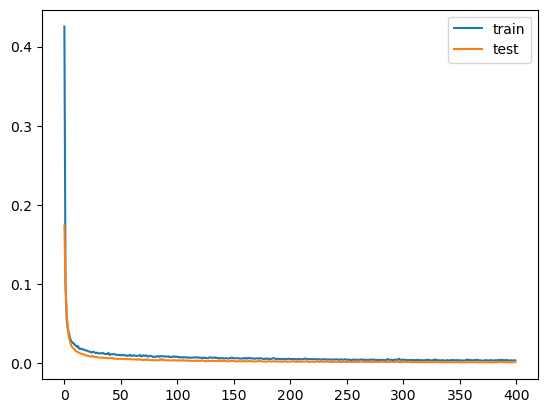

In [20]:
from tensorflow.keras.models import load_model
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
X_train_encode, X_test_encode

4/4 [==============================] - 0s 2ms/step


(array([[ 0.9222356 , -1.1342809 ,  1.9126492 , ...,  0.8987368 ,
         -0.6316383 ,  1.3506067 ],
        [ 0.30656615, -2.7538586 , -0.21310006, ..., -0.14656411,
         -1.0240393 , -0.65034515],
        [ 0.17662506, -2.204924  , -0.07599185, ..., -0.56000376,
         -1.2530621 , -0.12195865],
        ...,
        [ 0.9638708 , -1.5714529 ,  1.1597657 , ...,  1.1572444 ,
         -0.4189967 , -0.7472342 ],
        [ 0.8436815 , -2.9039395 , -0.6101377 , ..., -0.2877049 ,
         -1.3820343 , -1.1874201 ],
        [ 0.8935609 , -1.2426273 ,  2.698875  , ...,  1.0865065 ,
         -2.5131147 ,  2.1531916 ]], dtype=float32),
 array([[ 0.5868315 , -1.783126  ,  1.7621084 , ..., -0.2391154 ,
         -1.2371608 ,  1.7642552 ],
        [ 0.09818484, -1.1204567 ,  1.044807  , ...,  0.64768916,
         -1.6107126 ,  1.6020889 ],
        [ 0.8476728 , -1.8304179 ,  1.6455642 , ...,  1.5488914 ,
         -0.91954654, -1.4548612 ],
        ...,
        [ 0.7731933 , -2.1887553 ,  0.2

In [19]:
# #df_feat=featurizer.featurize_dataframe(data.df_structure.iloc[[5530]], 'structure')
# #df_feat, 
# def nspec(x):
#     return len(x.species)
# data.df_structure['species']= data.df_structure['structure'].apply(nspec) #.iloc[5530].values[0].species
# data.df_structure['species'].sort_values()

In [41]:
for results in [(1.2,2,3),(1.2,2,3),(1.2,2,3)]:
    with open('results.txt', 'a') as f:
        f.write(' '.join(map(str,results)))
        f.write('\n')


In [42]:
!cat results.txt

/bin/bash: /mnt/c/Users/roger/Documents/programas/UCLouvain/env_modnet/lib/libtinfo.so.6: no version information available (required by /bin/bash)
1.2 2 31.2 2 31.2 2 31.2 2 3
1.2 2 3
1.2 2 3


In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.df_structure.iloc[5529]['structure']


Structure Summary
Lattice
    abc : 3.930170626613603 3.930170626613603 3.930170626613603
 angles : 90.0 90.0 90.0
 volume : 60.706363276205764
      A : 3.930170626613603 0.0 0.0
      B : 0.0 3.930170626613603 0.0
      C : 0.0 0.0 3.930170626613603
PeriodicSite: Ta (2.6090, 3.9302, 0.0000) [0.6638, 1.0000, 0.0000]
PeriodicSite: Ga (0.0259, 1.9651, 1.9651) [0.0066, 0.5000, 0.5000]
PeriodicSite: N (3.5263, 3.9302, 1.9651) [0.8972, 1.0000, 0.5000]
PeriodicSite: N (3.5263, 1.9651, 3.9302) [0.8972, 0.5000, 1.0000]
PeriodicSite: N (1.9054, 1.9651, 1.9651) [0.4848, 0.5000, 0.5000]

In [20]:
# unique=np.array([112,313,145,222,233])
# ex0=np.array([0.2,0.5])
# ex=np.array([112,145])
# zeros=np.zeros(len(unique))

# toinsert=np.nonzero(np.in1d(unique,ex))[0]
# unique,ex,ex0,zeros,toinsert
# zeros[toinsert]=ex0